In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt # Kaden
import numpy as np # Kaden
#sets a random number seed 
np.random.seed(119)
#sets the number of data points 
npoints = 50

x = np.linspace(0, 10., npoints)
# sets slope, intercept, and scatter rms
m = 2.0
b = 1.0
sigma = 2.0
# gennerates y points 
y = m*x + b + np.random.normal(scale=sigma,size=npoints)
y_err = np.full(npoints,sigma)
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')


(82,)
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1]
41
-0.5087791172119824 0.8625014016367298 3.0955274487264135 4.402681879946231
[6.57, 5.38, 5.26, 4.13, 3.48, 2.62, 1.83, 3.57, 4.54, 3.76, 3.9, 4.73, 5.66, 5.33, 5.23, 6.67, 4.74, 4.69, 4.2, 3.68, 2.47, 2.59, 4.1, 3.17, 3.71, 4.04, 4.07, 5.93, 6.89, 6.72, 6.77, 5.77, 4.35, 4.23, 2.24, 3.45, 4.13, 3.34, 3.32, 5.21, 4.83]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


Text(0, 0.5, 'height in inches')

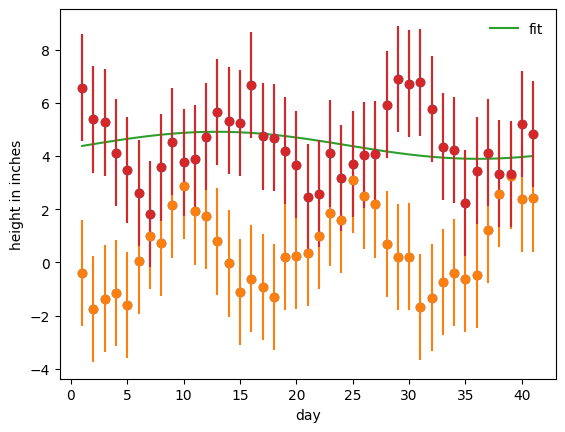

In [58]:
import numpy as np
data = np.genfromtxt("ASTR19_F24_group_project_data.txt",dtype=[('day','i8'),('time','S5'),('height','f8')])
from scipy import optimize 



day = []
time = []
height = []

day_low = [] # Kaden
time_low = [] # Kaden
height_low = [] # Kaden
day_high = [] # Kaden
time_high = [] # Kaden
height_high = [] # Kaden

print(data.shape)

for i in range(82):
    day.append(data[i][0])
    time.append(data[i][1].decode("utf-8"))
    height.append(data[i][2])
# -------- Kaden -------
for i in range(0, 82, 2):
    day_low.append(data[i][0])
    time_low.append(data[i][1].decode("utf-8"))
    height_low.append(data[i][2])
for i in range(1, 83, 2):
    day_high.append(data[i][0])
    time_high.append(data[i][1].decode("utf-8"))
    height_high.append(data[i][2])
'''
print(day_low)
print(' ')
print(time_low)
print(' ')
print(height_low)

'''
import matplotlib.pyplot as plt
#-------------------------------------------------------------
#redefine x and y
npoints = len(day_low)
x = np.linspace(0.,2*np.pi,npoints)

#make y a complicated function
a = 3.4
b = 2.1
c = 0.27
d = -1.3
sig = 0.1

y_err = np.full(npoints, sig)
print(y_err)
print(len(y_err))

#import optimize from scipy
from scipy import optimize

#define the function to fit
def f_line(x, a, b, c, d):
    return a * np.sin( b*x + c) + d

#perform the fit
params, params_cov = optimize.curve_fit(f_line, day_low,height_low)

a_fit = params [0]
b_fit = params[1]
c_fit = params [2]
d_fit = params [3]

print(a_fit,b_fit,c_fit,d_fit)

y_fit = a_fit * np.sin(b_fit * x + c_fit) + d_fit

plt.errorbar(day_low,height_low,sigma,fmt='o') # Kaden
plt.errorbar(day_high,height_high,sigma,fmt='o') # Kaden
plt.plot(day_low,y_fit, label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0, frameon=False)
print(height_low)
print(day_low)

#---------------------------------------------------------------
plt.errorbar(day_low,height_low,sigma,fmt='o') # Kaden
plt.scatter(day_high, height_high)
plt.xlabel("day")
plt.ylabel("height in inches")
